# Schlogl's model

This example introduces Schlogl's model of a system of chemical reactions ([Schlogl, 1972](https://link.springer.com/content/pdf/10.1007/BF01379769.pdf)).
This model describes the stochastic process made of four chemical reactions that take place on a single molecule type, $A$.


Given an initial concentration of the substance, $n_0$, the process can be described by the following equations:

   $$2A \xrightarrow{k_1} 3A$$
   $$3A \xrightarrow{k_2} 2A$$
   $$\emptyset \xrightarrow{k_3} A$$
   $$A \xrightarrow{k_4} \emptyset$$

In PINTS, this model is simulated according to the Gillespie stochastic simulation algorithm [(Gillespie, 1976)](https://doi.org/10.1016/0021-9991%2876%2990041-3).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pints
import pints.toy as toy
import pints.toy.stochastic

We specify the initial population size, and here we use the default parameters given in the PINTS implementation, which are taken from [Erban et al., 2007](https://arxiv.org/abs/0704.1908).

k =  [1.80e-01 2.50e-04 2.20e+03 3.75e+01]


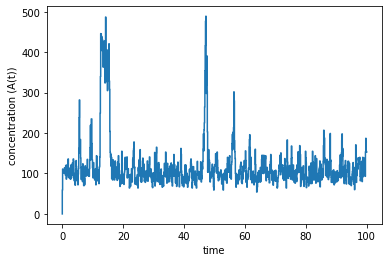

In [2]:
# instantiate model
n_0 = 0
model = toy.stochastic.SchloglModel(n_0)

# get default parameters
k = model.suggested_parameters()
print("k = ", k)

# simulate model
times = np.linspace(0, 100, 1000)
values = model.simulate(k, times)

# plot
plt.step(times, values)
plt.xlabel('time')
plt.ylabel('concentration (A(t))')
plt.show()

Given the stochastic nature of this model, every iteration returns a different result. However, we can compute deterministically the solution to the equivalent ordinary differential equation ([Erban et al., 2007](https://arxiv.org/abs/0704.1908)):

$ \frac{\text{d}a}{\text{d}t} = -k_2 a^3 + k_1 a^2 - k_4 a + k_3 $.

We then plot the ODE solution and compare it to the stochastic simulation. A key feature of this system is the random switching that is seen in the stochastic simulations, which is not captured by the ODE solution.

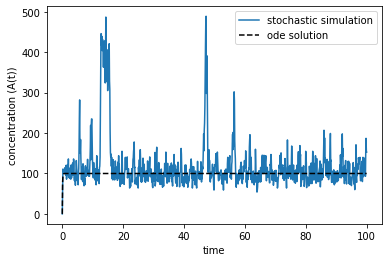

In [3]:
# solve ODE
def rhs(y, t):
    dydt = [-k[1] * (y[0] ** 3) + k[0] * (y[0] ** 2) - k[3] * y[0] + k[2]]
    return dydt

x_0 = [0]
times = np.linspace(0, 100, 1000)

from scipy.integrate import odeint
sol = odeint(rhs, x_0, times)

# plot
plt.xlabel('time')
plt.ylabel('concentration (A(t))')
plt.plot(times, values, label='stochastic simulation')
plt.plot(times, sol,'--', color='black', label='ode solution')
plt.legend()
plt.show()